In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_file_path = '../CSV/Full.csv'

In [3]:
df = pd.read_csv(csv_file_path, delimiter=',')

rename_dict = {col: col.strip('<>').strip() for col in df.columns}

df.rename(columns=rename_dict, inplace=True)

In [4]:
df.isna().sum()

TICKER    0
PER       0
DATE      0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64

In [5]:
uniq_ticker_names = df['TICKER'].unique()
df['prev_OPEN'] = df["OPEN"].shift(14)
df = df.drop(df.index[:14])
df = df.reset_index(drop=True)
for name in uniq_ticker_names:
    print(f'{name}- delta OPEN - CLOSE = {abs((df[df["TICKER"] == name]["prev_OPEN"] - df[df["TICKER"] == name]["CLOSE"])).mean()}')

AFLT- delta OPEN - CLOSE = 0.6788593106995884
ALRS- delta OPEN - CLOSE = 1.7263247753530166
GAZP- delta OPEN - CLOSE = 4.694697047496791
GMKN- delta OPEN - CLOSE = 331.38926957638
HYDR- delta OPEN - CLOSE = 26.10784145057766
IRAO- delta OPEN - CLOSE = 0.06308516046213093
LKOH- delta OPEN - CLOSE = 94.13060462130937
MGNT- delta OPEN - CLOSE = 74.68042362002568
MOEX- delta OPEN - CLOSE = 9.051761232349167
MTLR- delta OPEN - CLOSE = 3.7537790592899625
MTSS- delta OPEN - CLOSE = 3.3598896020539155
NLMK- delta OPEN - CLOSE = 3.0692233632862647
ROSN- delta OPEN - CLOSE = 8.042417201540436
RTSI- delta OPEN - CLOSE = 29.144784834123225
SBER- delta OPEN - CLOSE = 5.074148908857509
SNGS- delta OPEN - CLOSE = 0.8794396662387677
VTBR- delta OPEN - CLOSE = 0.04427385943517329
YNDX- delta OPEN - CLOSE = 72.29065158395474


In [6]:
df.head(3)

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,prev_OPEN
0,AFLT,60,2021.01.12,110000,73.96,74.54,73.96,74.38,2598350,73.36
1,AFLT,60,2021.01.12,120000,74.38,74.46,73.98,74.04,1614960,73.40
2,AFLT,60,2021.01.12,130000,74.04,74.28,74.00,74.20,827070,73.92


In [7]:
df.drop('PER', axis=1, inplace=True)

МИН МАКС 25 50 75 

МОДА

In [8]:
df

,TICKER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,prev_OPEN
0,AFLT,2021.01.12,110000,73.96,74.54,73.96,74.38,2598350,73.36
1,AFLT,2021.01.12,120000,74.38,74.46,73.98,74.04,1614960,73.40
2,AFLT,2021.01.12,130000,74.04,74.28,74.00,74.20,827070,73.92
3,AFLT,2021.01.12,140000,74.18,74.46,74.18,74.34,775200,74.44
4,AFLT,2021.01.12,150000,74.34,74.44,74.18,74.36,647940,74.12
...,...,...,...,...,...,...,...,...,...
135433,YNDX,2023.05.31,200000,2335.00,2345.80,2322.00,2328.00,41116,2310.00
135434,YNDX,2023.05.31,210000,2327.60,2330.00,2320.20,2327.40,16282,2303.80
135435,YNDX,2023.05.31,220000,2327.40,2327.40,2320.20,2321.00,11562,2304.60
135436,YNDX,2023.05.31,230000,2321.00,2325.00,2320.00,2322.40,13676,2311.40


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df['TICKER'] = le.fit_transform(df['TICKER'])
df

,TICKER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,prev_OPEN
0,0,2021.01.12,110000,73.96,74.54,73.96,74.38,2598350,73.36
1,0,2021.01.12,120000,74.38,74.46,73.98,74.04,1614960,73.40
2,0,2021.01.12,130000,74.04,74.28,74.00,74.20,827070,73.92
3,0,2021.01.12,140000,74.18,74.46,74.18,74.34,775200,74.44
4,0,2021.01.12,150000,74.34,74.44,74.18,74.36,647940,74.12
...,...,...,...,...,...,...,...,...,...
135433,17,2023.05.31,200000,2335.00,2345.80,2322.00,2328.00,41116,2310.00
135434,17,2023.05.31,210000,2327.60,2330.00,2320.20,2327.40,16282,2303.80
135435,17,2023.05.31,220000,2327.40,2327.40,2320.20,2321.00,11562,2304.60
135436,17,2023.05.31,230000,2321.00,2325.00,2320.00,2322.40,13676,2311.40


# КОД

In [11]:
df.drop('DATE', axis=1, inplace=True)
df.drop('TIME', axis=1, inplace=True)

In [12]:
df.corr().style.background_gradient('gray').format('{:.2g}'.format)

,TICKER,OPEN,HIGH,LOW,CLOSE,VOL,prev_OPEN
TICKER,1,-0.21,-0.21,-0.21,-0.21,0.17,-0.21
OPEN,-0.21,1,1,1,1,-0.05,1
HIGH,-0.21,1,1,1,1,-0.05,1
LOW,-0.21,1,1,1,1,-0.05,1
CLOSE,-0.21,1,1,1,1,-0.05,1
VOL,0.17,-0.05,-0.05,-0.05,-0.05,1,-0.05
prev_OPEN,-0.21,1,1,1,1,-0.05,1


In [13]:
from hlpflsht import HelpHackathon

In [14]:
hh = HelpHackathon(df, 'TICKER')

In [15]:
hh.average_price(df, le)

Средняя цена акции: (sum(OPEN) + sum(CLOSE)) + sum(LOW) + sum(HIGH) / 4 / N
AFLT среднее значение 48.92325006430042
ALRS среднее значение 95.63948459563542
GAZP среднее значение 244.06974165596918
GMKN среднее значение 20104.273170731707
HYDR среднее значение 0.7888905937098845
IRAO среднее значение 4.047016270860077
LKOH среднее значение 5452.448106546854
MGNT среднее значение 5083.61779525032
MOEX среднее значение 133.67551476251603
MTLR среднее значение 115.93771220039648
MTSS среднее значение 281.80027759948655
NLMK среднее значение 180.5192644415918
ROSN среднее значение 467.0663510911425
RTSI среднее значение 1332.1125488151658
SBER среднее значение 233.64805584082157
SNGS среднее значение 29.90418148267009
VTBR среднее значение 0.03339808584724005
YNDX среднее значение 3554.0644253021346


In [16]:
hh.standart_deviation(df, le)

Стандартное отклонение AFLT - 38.306184531320895
Стандартное отклонение ALRS - 58.21987887144057
Стандартное отклонение GAZP - 135.03613214782732
Стандартное отклонение GMKN - 9135.790083689752
Стандартное отклонение HYDR - 0.08664002932842499
Стандартное отклонение IRAO - 1.659718283093937
Стандартное отклонение LKOH - 2272.550528623318
Стандартное отклонение MGNT - 1157.5467404555295
Стандартное отклонение MOEX - 74.19784901586193
Стандартное отклонение MTLR - 67.21956362046633
Стандартное отклонение MTSS - 85.91754660813066
Стандартное отклонение NLMK - 115.72437898757194
Стандартное отклонение ROSN - 216.32080875763137
Стандартное отклонение RTSI - 574.6056525889148
Стандартное отклонение SBER - 163.6714131697677
Стандартное отклонение SNGS - 13.471907091432696
Стандартное отклонение VTBR - 0.02965553199903427
Стандартное отклонение YNDX - 3141.5021964555485


# Сезонность

AFLT - сезонности не наблюдается, тест Дики-Фуллера не пройден

ALRS - сезонности не наблюдается, тест Дики-Фуллера не пройден

GAZP - сезонности не наблюдается, тест Дики-Фуллера не пройден

GMKN - сезонности не наблюдается, тест Дики-Фуллера не пройден

HYDR - ADF -2.8836749998642626, 5% -2.8619128200550303, p-value 0.04727957346703448, однако автокореляционная функция движется в зону статистической значимости, что может указывать на отсутствие корреляции

IRAO - сезонности не наблюдается, тест Дики-Фуллера не пройден

LKOH - сезонности не наблюдается, тест Дики-Фуллера не пройден

MGNT - ADF -2.5741322979892005, 10% -2.5669684731473446, p-value 0.09846231538115974, однако автокореляционная функция движется в зону статистической значимости, что может указывать на отсутствие корреляции

MOEX - сезонности не наблюдается, тест Дики-Фуллера не пройден

MTLR - сезонности не наблюдается, тест Дики-Фуллера не пройден

MTSS - сезонности не наблюдается, тест Дики-Фуллера не пройден

NLMK - сезонности не наблюдается, тест Дики-Фуллера не пройден

ROSN - сезонности не наблюдается, тест Дики-Фуллера не пройден

RTSI - сезонности не наблюдается, тест Дики-Фуллера не пройден

SBER - сезонности не наблюдается, тест Дики-Фуллера не пройден

SNGS - сезонности не наблюдается, тест Дики-Фуллера не пройден

VTBR - сезонности не наблюдается, тест Дики-Фуллера не пройден

YNDX - сезонности не наблюдается, тест Дики-Фуллера не пройден

## Код для сезонности

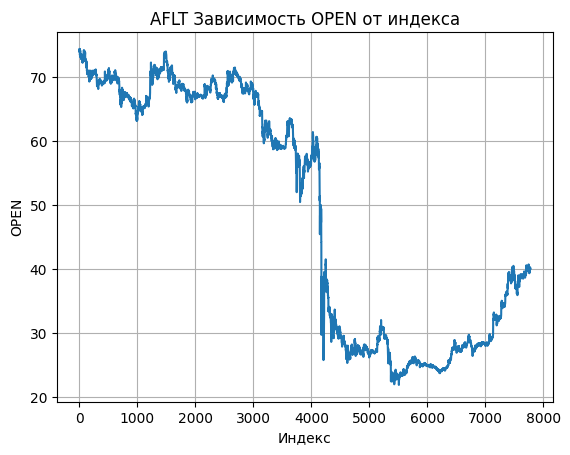

ADF Statistic: -1.2427055782187804
p-value: 0.654960508388871
{'1%': -3.4311950419557253, '5%': -2.8619134462764433, '10%': -2.566968780890455}


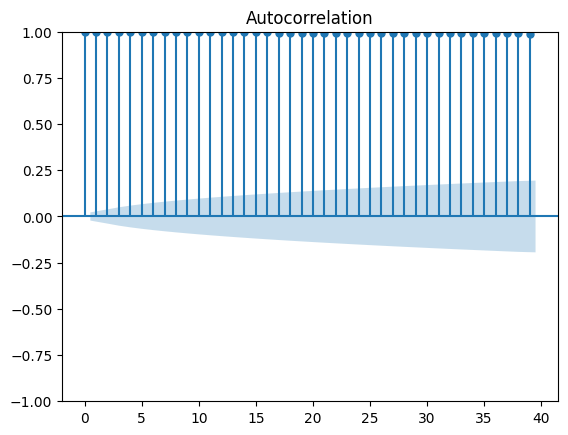

In [17]:
hh.sesonial_gr(df, le, i=0)

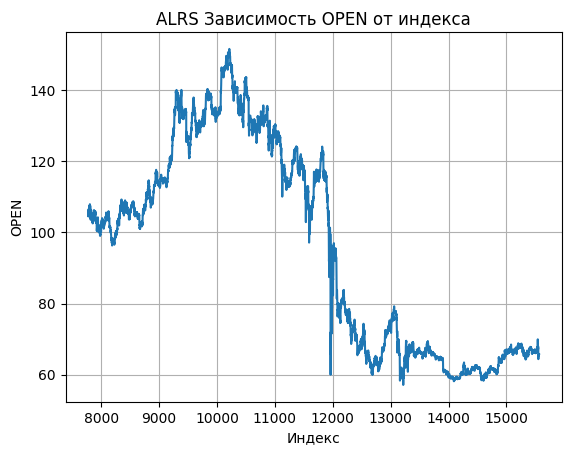

ADF Statistic: -0.8071978775507608
p-value: 0.8169985964910194
{'1%': -3.4311937335765332, '5%': -2.861912868151336, '10%': -2.5669684731473446}


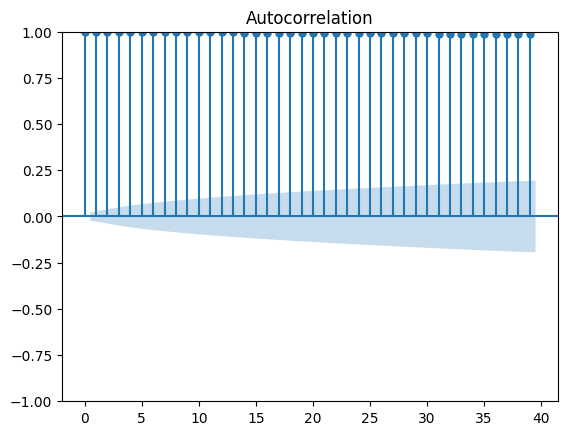

In [18]:
hh.sesonial_gr(df, le, i=1)

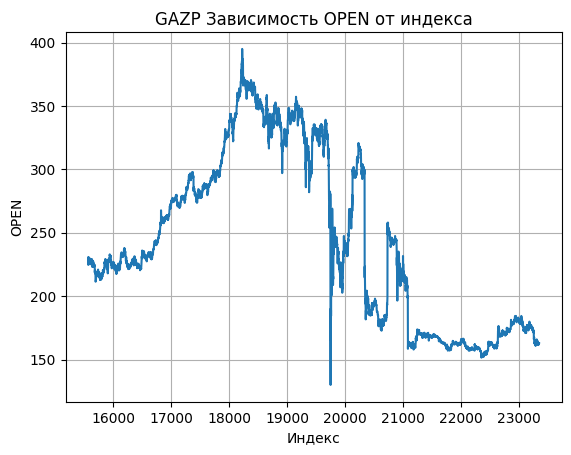

ADF Statistic: -1.1926667813250509
p-value: 0.676742295287413
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


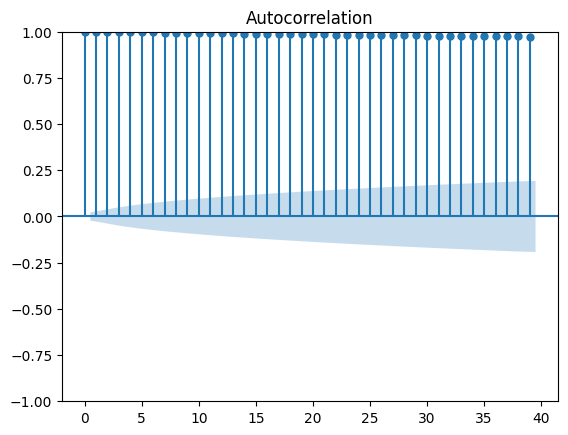

In [19]:
hh.sesonial_gr(df, le, i=2)

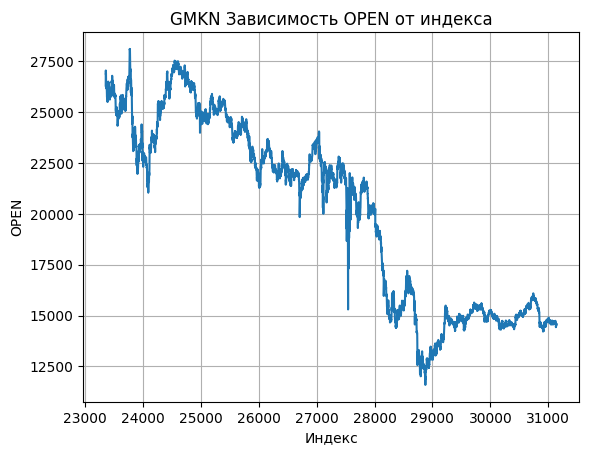

ADF Statistic: -1.042858137509957
p-value: 0.7373137466271463
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


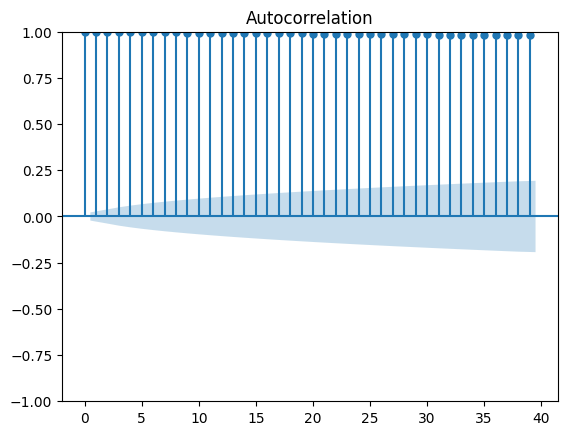

In [20]:
hh.sesonial_gr(df, le, i=3)

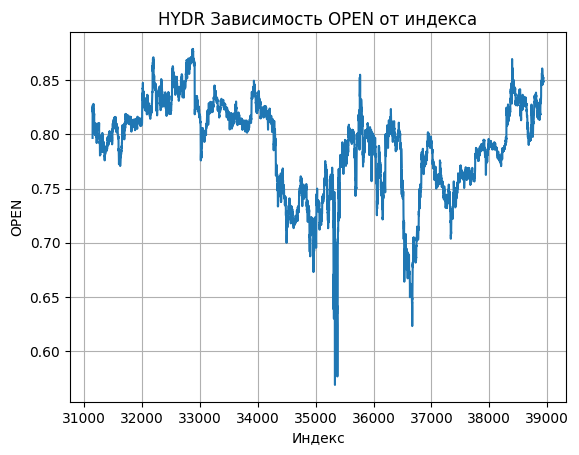

ADF Statistic: -2.8836749998642626
p-value: 0.04727957346703448
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


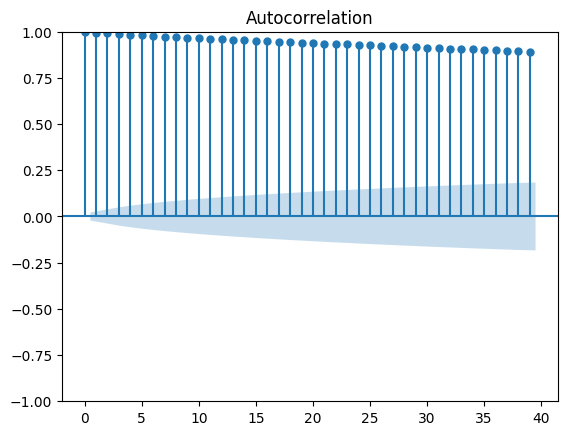

In [21]:
hh.sesonial_gr(df, le, i=4)

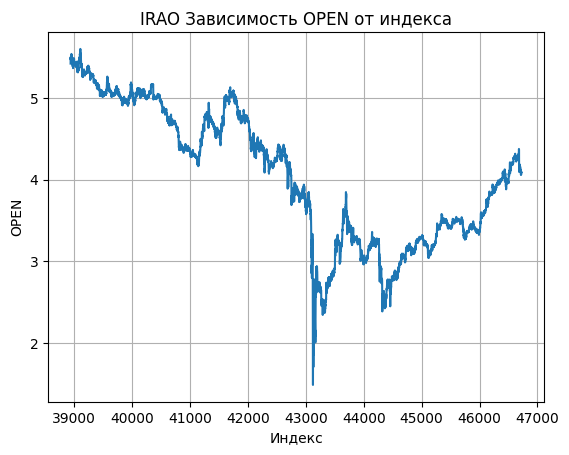

ADF Statistic: -1.844143090142425
p-value: 0.35877639227093444
{'1%': -3.4311937335765332, '5%': -2.861912868151336, '10%': -2.5669684731473446}


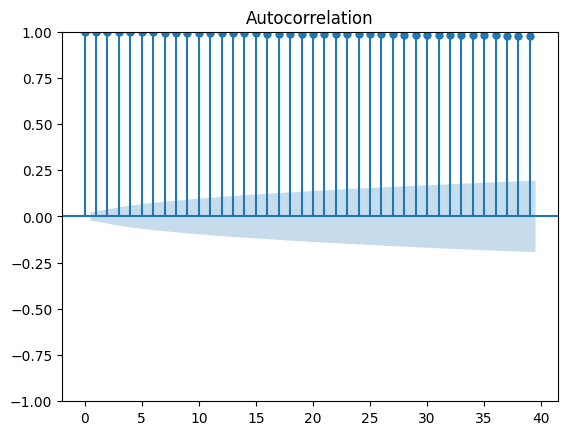

In [22]:
hh.sesonial_gr(df, le, i=5)

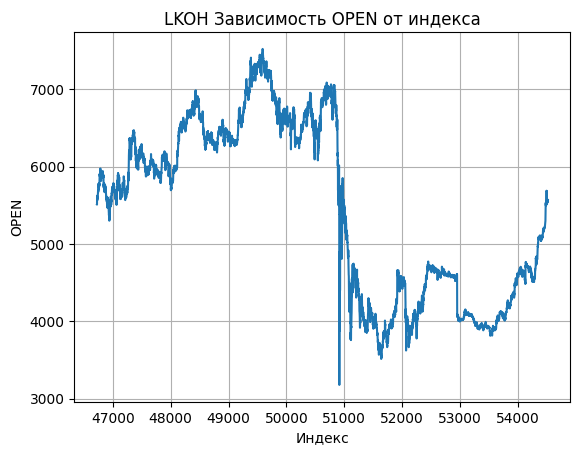

ADF Statistic: -1.3081079856632134
p-value: 0.6254547848428067
{'1%': -3.4311935159071316, '5%': -2.8619127719711313, '10%': -2.566968421949442}


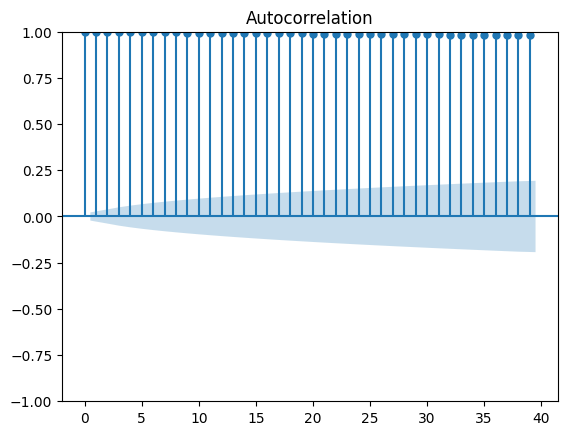

In [23]:
hh.sesonial_gr(df, le, i=6)

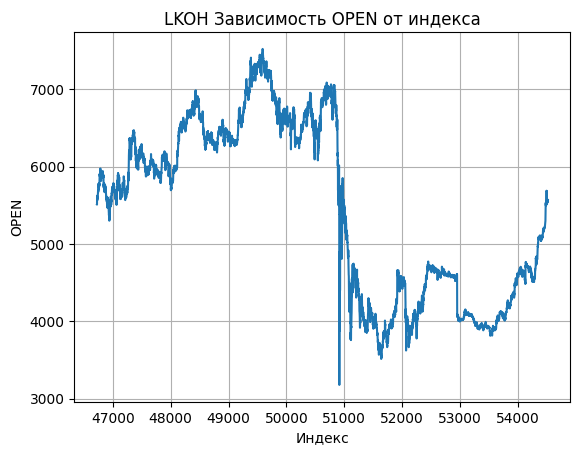

ADF Statistic: -1.3081079856632134
p-value: 0.6254547848428067
{'1%': -3.4311935159071316, '5%': -2.8619127719711313, '10%': -2.566968421949442}


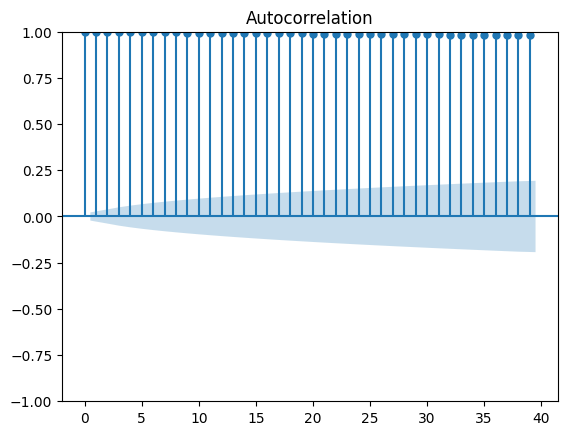

In [24]:
hh.sesonial_gr(df, le, i=6)

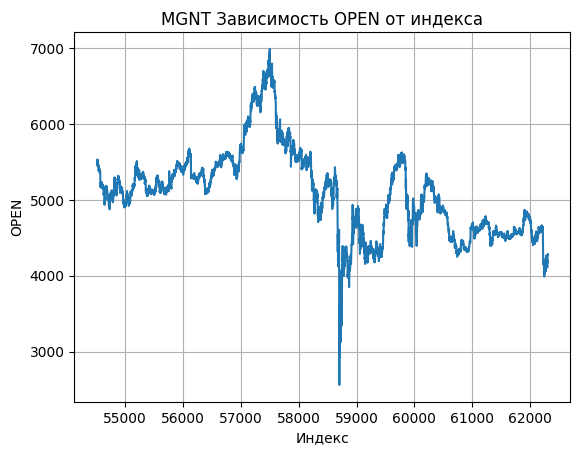

ADF Statistic: -2.5741322979892005
p-value: 0.09846231538115974
{'1%': -3.4311937335765332, '5%': -2.861912868151336, '10%': -2.5669684731473446}


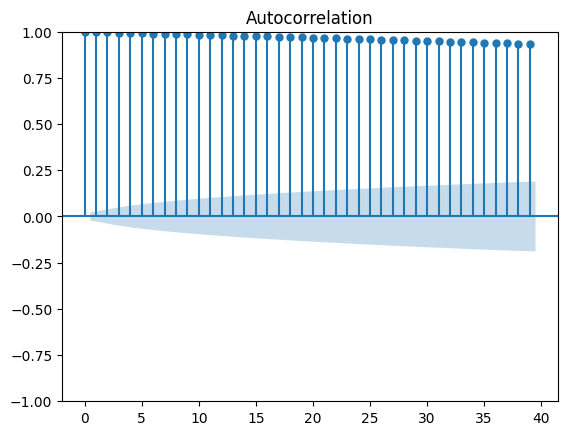

In [25]:
hh.sesonial_gr(df, le, i=7)

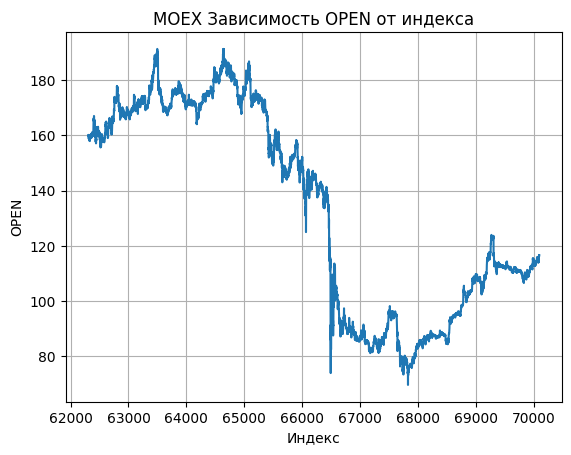

ADF Statistic: -0.9270403871800561
p-value: 0.7789372698599698
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


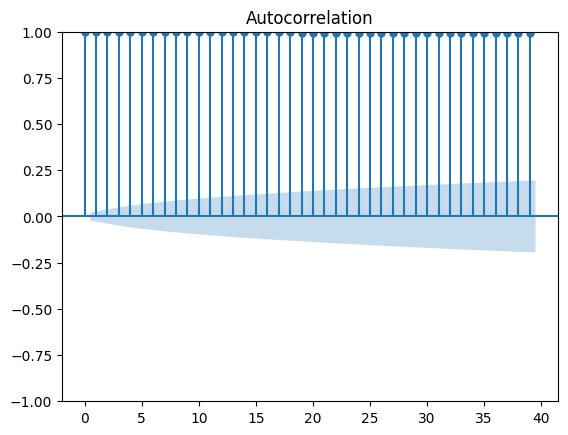

In [26]:
hh.sesonial_gr(df, le, i=8)

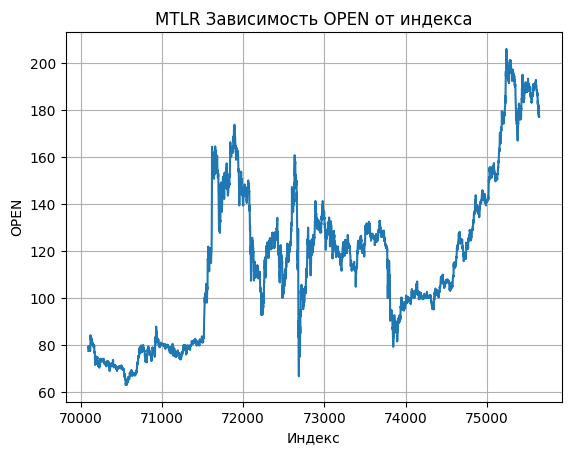

ADF Statistic: -1.3582473988809214
p-value: 0.6021212172163609
{'1%': -3.431534777697508, '5%': -2.862063554520878, '10%': -2.5670486868331226}


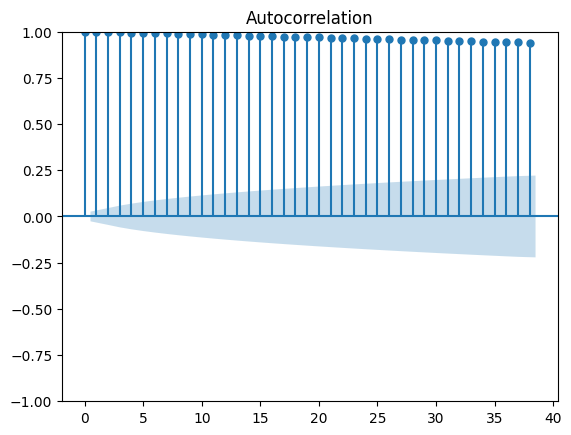

In [27]:
hh.sesonial_gr(df, le, i=9)

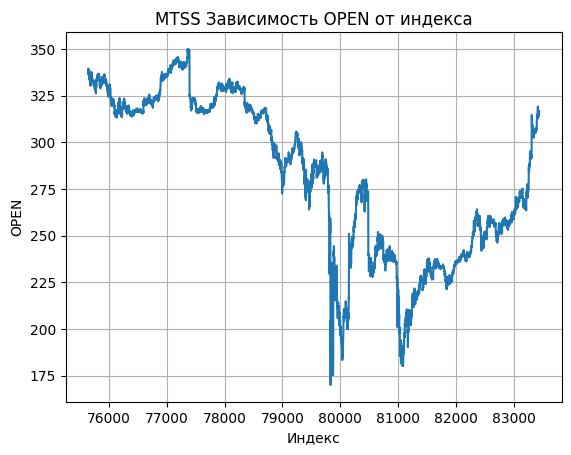

ADF Statistic: -1.559009858475222
p-value: 0.5041446368376779
{'1%': -3.431193407114542, '5%': -2.8619127238996334, '10%': -2.566968396360395}


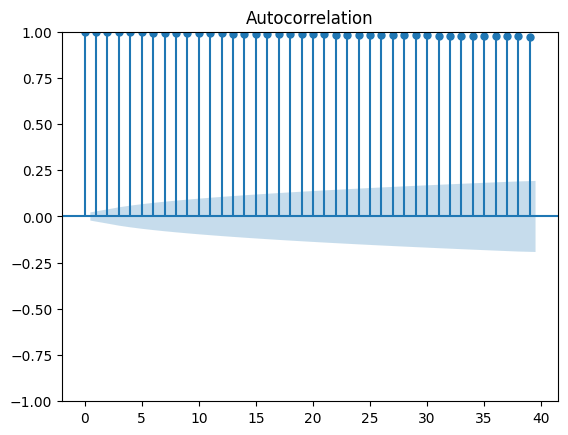

In [28]:
hh.sesonial_gr(df, le, i=10)

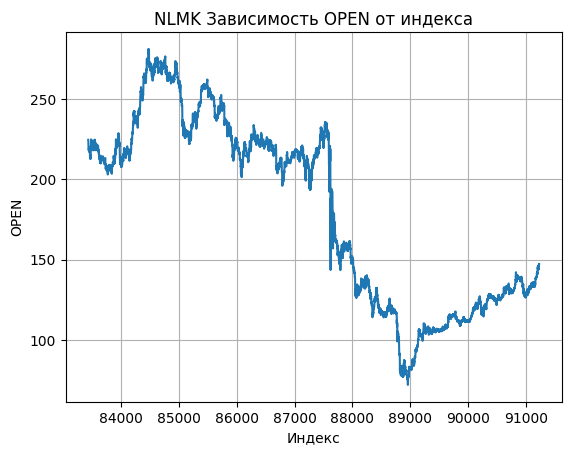

ADF Statistic: -0.8908837133102742
p-value: 0.7909597152140677
{'1%': -3.4311937335765332, '5%': -2.861912868151336, '10%': -2.5669684731473446}


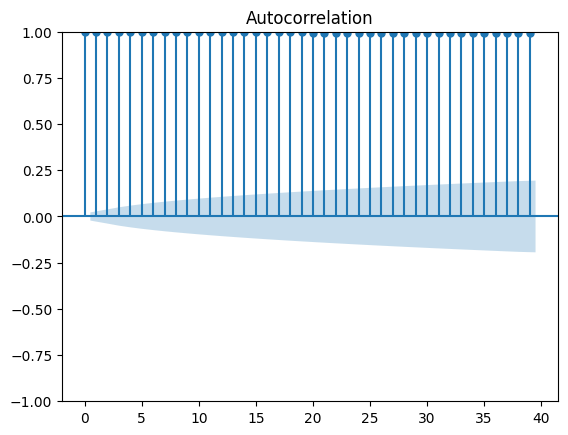

In [29]:
hh.sesonial_gr(df, le, i=11)

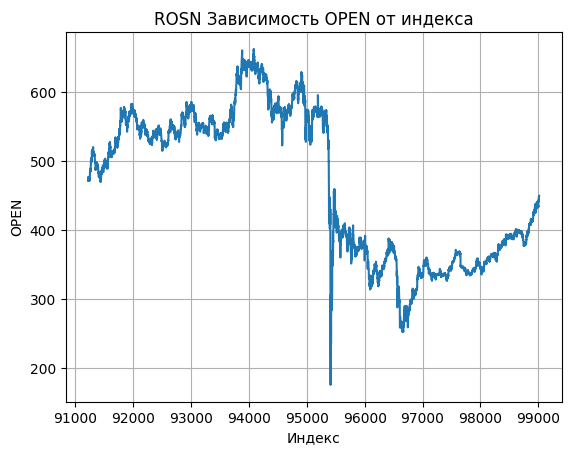

ADF Statistic: -1.5651882044306542
p-value: 0.5010531062201936
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


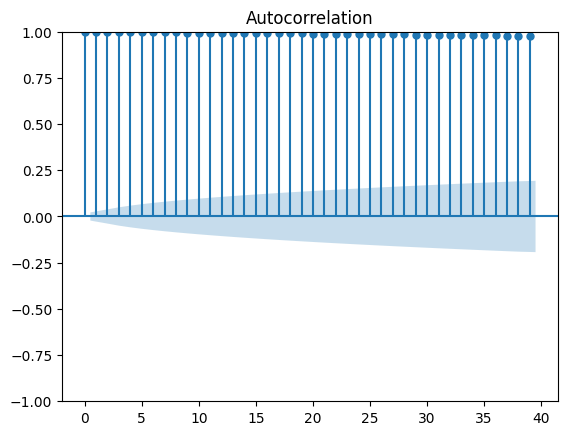

In [30]:
hh.sesonial_gr(df, le, i=12)

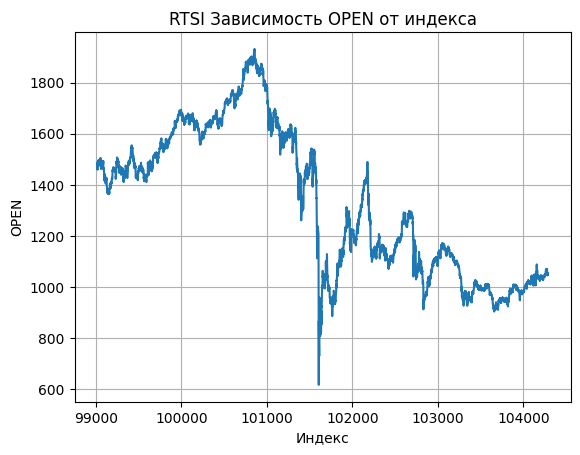

ADF Statistic: -1.4897867246593115
p-value: 0.538557514342532
{'1%': -3.4315983315618617, '5%': -2.862091633146115, '10%': -2.567063634032898}


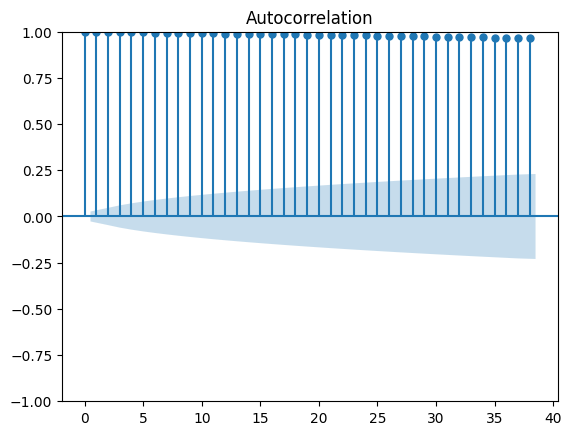

In [31]:
hh.sesonial_gr(df, le, i=13)

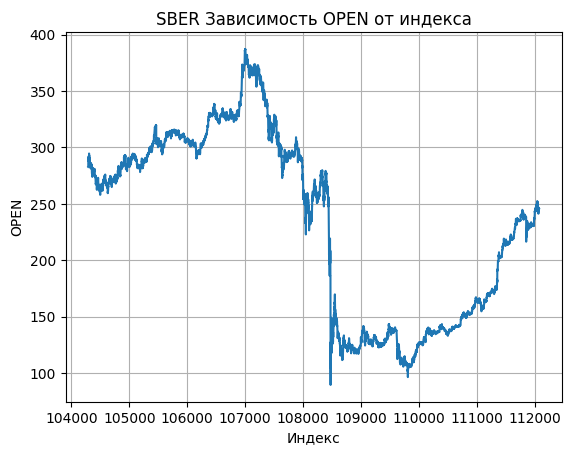

ADF Statistic: -1.1841549940151366
p-value: 0.6803744253476244
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


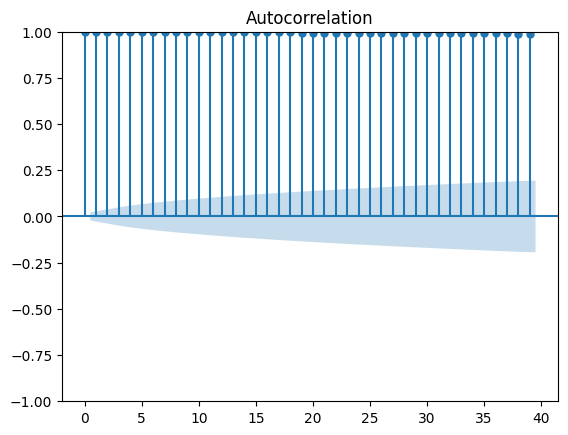

In [32]:
hh.sesonial_gr(df, le, i=14)

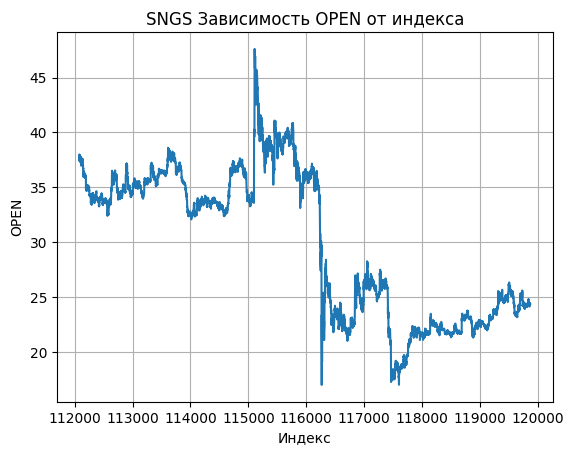

ADF Statistic: -1.5772975216164702
p-value: 0.4949868628934806
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


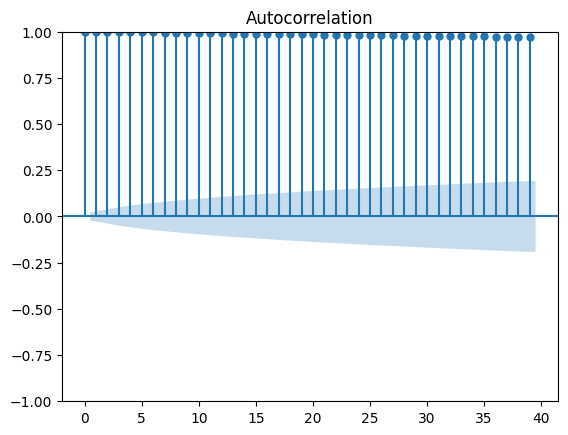

In [33]:
hh.sesonial_gr(df, le, i=15)

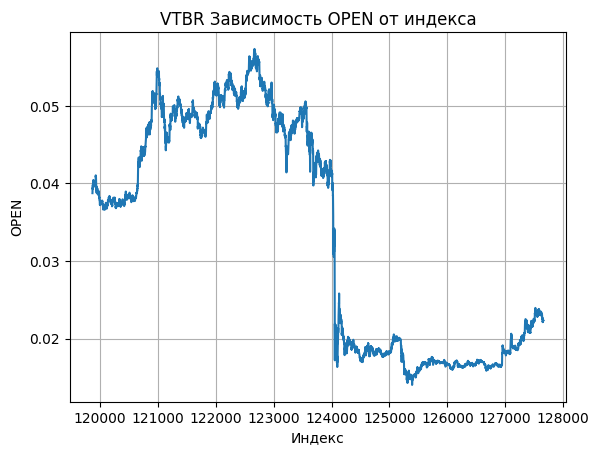

ADF Statistic: -0.8982144836436841
p-value: 0.7885598451223453
{'1%': -3.431193624727792, '5%': -2.8619128200550303, '10%': -2.5669684475450913}


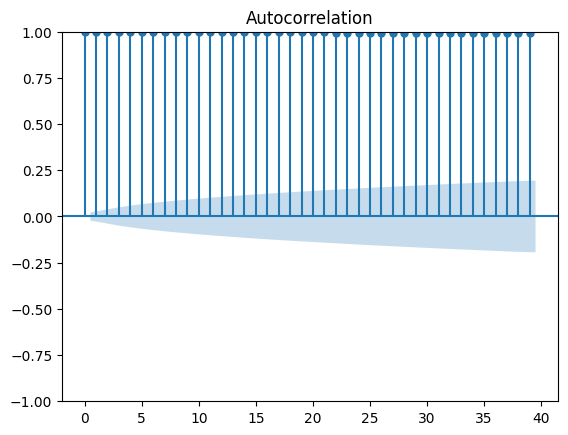

In [34]:
hh.sesonial_gr(df, le, i=16)

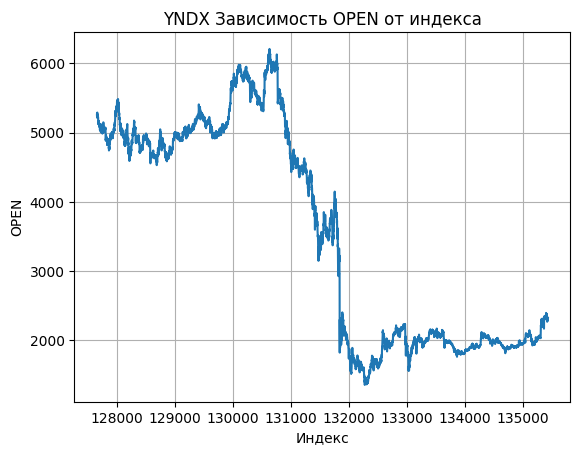

ADF Statistic: -0.8916849149928915
p-value: 0.7906983596803655
{'1%': -3.43119493276916, '5%': -2.8619133980308873, '10%': -2.56696875520875}


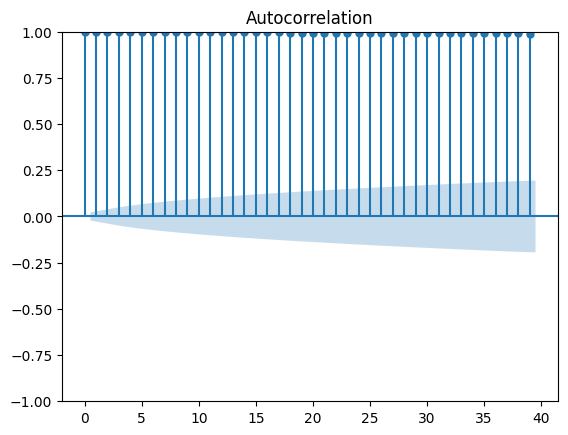

In [35]:
hh.sesonial_gr(df, le, i=17)

# Скользящее среднее

С командой решили смотреть торги в месяц

В месяц записей проходит 210 штук -> окно 210

AFLT - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

ALRS - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

GAZP - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

GMKN - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

HYDR - ADF -3.3599723369018815, 5% -2.861923200151679, p-value 0.012401488837540492, однако автокореляционная функция движется в зону статистической значимости, что может указывать на отсутствие корреляции

IRAO - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

LKOH - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

MGNT - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

MOEX - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

MTLR - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

MTSS - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

NLMK - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

ROSN - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

RTSI - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

SBER - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

SNGS - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

VTBR - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

YNDX - для сглаженных значений сезонности не наблюдается, тест Дики-Фуллера не пройден

In [36]:
hh.moving_average(df, le, window_size=210)
# hh.sesonial_gr(df, le, i = 4, column_name='SMA')

In [37]:
df.head(10)

,TICKER,OPEN,HIGH,LOW,CLOSE,VOL,prev_OPEN,SMA
0,0,73.96,74.54,73.96,74.38,2598350,73.36,NaN
1,0,74.38,74.46,73.98,74.04,1614960,73.40,NaN
2,0,74.04,74.28,74.00,74.20,827070,73.92,NaN
3,0,74.18,74.46,74.18,74.34,775200,74.44,NaN
4,0,74.34,74.44,74.18,74.36,647940,74.12,NaN
5,0,74.38,74.44,74.02,74.08,1094110,74.34,NaN
6,0,74.04,74.20,73.52,73.54,2370510,74.20,NaN
7,0,73.58,73.84,73.14,73.42,2431960,73.54,NaN
8,0,73.42,74.04,73.12,73.54,1905380,73.56,NaN
9,0,73.54,74.04,73.50,73.78,453100,73.68,NaN


Декомпозиция для ['HYDR']


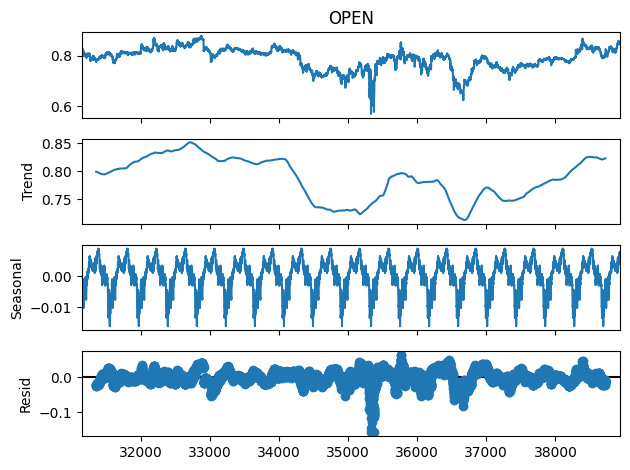

In [38]:
hh.hackathon_seasonal_decompose(df,le, 4, column_name='OPEN', period=14*30)

In [39]:
df.drop(['SMA'], axis = 1, inplace= True)

Акции больше растут или падуют, можно посмотреть производную


# boillinger bands, *RSI*

## RSI

U = close_today - close_yesterday
D = 0

U = 0
D = close_yesterday - close_today

RS = SMMA[N] of U / SMMA[N] of D

RSI = 100 - 100 / (1 + RS)

In [40]:
df = pd.read_csv(csv_file_path, delimiter=',')

rename_dict = {col: col.strip('<>').strip() for col in df.columns}

df.rename(columns=rename_dict, inplace=True)

df = df.drop(['PER','DATE','TIME'], axis=1)

hh = HelpHackathon(df)

In [41]:
df.head(3)

,TICKER,OPEN,HIGH,LOW,CLOSE,VOL
0,AFLT,73.36,73.54,72.68,73.40,3627090
1,AFLT,73.40,74.12,73.38,73.92,4020500
2,AFLT,73.92,74.56,73.90,74.44,3849530


In [42]:
hh.calculate_smma_of_u(df, 14)
hh.calculate_smma_of_d(df, 14)
df = df.dropna()

In [43]:
df_rsi = df.copy(deep=True)
df_rsi.drop(['U', 'D'], axis=1, inplace=True)
df_rsi['RS'] = df['SMMA_U'] / df_rsi['SMMA_D']
df_rsi['RSI'] = 100 - 100 / df_rsi['RS']

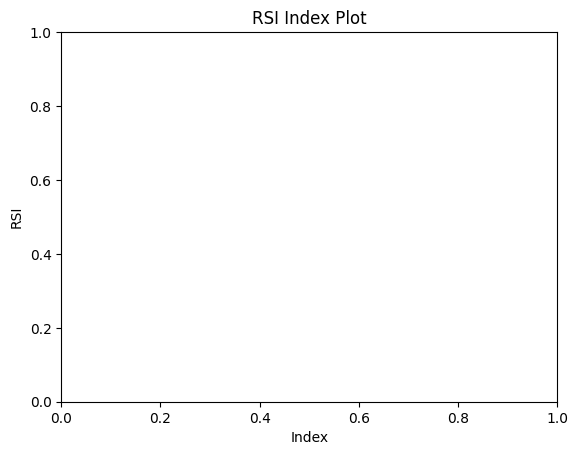

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = df_rsi[df_rsi['TICKER'] == 3]

filtered_data.reset_index(inplace=True)

rsi_values = filtered_data['RSI']

index_data = pd.DataFrame({'Index': filtered_data.index})

sns.lineplot(data=index_data, x='Index', y=rsi_values)

plt.title('RSI Index Plot')
plt.xlabel('Index')
plt.ylabel('RSI')

plt.show()


In [45]:
df=df.drop(['U','SMMA_U','D','SMMA_D'], axis=1)

## boillinger bands

In [46]:
df = pd.read_csv(csv_file_path, delimiter=',')

rename_dict = {col: col.strip('<>').strip() for col in df.columns}

df.rename(columns=rename_dict, inplace=True)

df = df.drop(['PER','DATE','TIME'], axis=1)

hh = HelpHackathon(df)

In [47]:
hh.moving_average(df, le, window_size=14)

In [48]:
df.head(3)

,TICKER,OPEN,HIGH,LOW,CLOSE,VOL,SMA
0,AFLT,73.36,73.54,72.68,73.40,3627090,NaN
1,AFLT,73.40,74.12,73.38,73.92,4020500,NaN
2,AFLT,73.92,74.56,73.90,74.44,3849530,NaN


In [49]:
from numpy import sqrt
df.dropna(inplace=True)
df['SD'] = df['SMA'].copy(deep=True)
for name in hh.uniq_ticker_names:
    indexes = df[df['TICKER'] == name].index
    df.loc[indexes, 'SD'] = sqrt((df.loc[indexes,'CLOSE'] - df.loc[indexes, 'SMA']) ** 2 )

In [50]:
k = 2

In [51]:
df['dfUpper_Band'] = df['SMA'] + (k * df['SD'])
df['Lower_Band'] = df['SMA'] - (k * df['SD'])
# где находится цена относительно полос. Значение %b равно 1 у верхней полосы и 0 у нижней полосы
df['%b'] = (df['OPEN'] - df['Lower_Band']) / (df['dfUpper_Band'] - df['Lower_Band'])

In [52]:
df

,TICKER,OPEN,HIGH,LOW,CLOSE,VOL,SMA,SD,dfUpper_Band,Lower_Band,%b
13,AFLT,74.04,74.10,73.92,74.08,354110,73.905714,0.174286,74.254286,73.557143,0.692623
14,AFLT,73.96,74.54,73.96,74.38,2598350,73.975714,0.404286,74.784286,73.167143,0.490283
15,AFLT,74.38,74.46,73.98,74.04,1614960,73.984286,0.055714,74.095714,73.872857,2.275641
16,AFLT,74.04,74.28,74.00,74.20,827070,73.967143,0.232857,74.432857,73.501429,0.578221
17,AFLT,74.18,74.46,74.18,74.34,775200,73.985714,0.354286,74.694286,73.277143,0.637097
...,...,...,...,...,...,...,...,...,...,...,...
135447,YNDX,2335.00,2345.80,2322.00,2328.00,41116,2305.957143,22.042857,2350.042857,2261.871429,0.829391
135448,YNDX,2327.60,2330.00,2320.20,2327.40,16282,2307.614286,19.785714,2347.185714,2268.042857,0.752527
135449,YNDX,2327.40,2327.40,2320.20,2321.00,11562,2308.314286,12.685714,2333.685714,2282.942857,0.876126
135450,YNDX,2321.00,2325.00,2320.00,2322.40,13676,2309.371429,13.028571,2335.428571,2283.314286,0.723136
